In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('./dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Eda

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Описание датасета.
Примечания:

- Churn - столбец таргета. Клиент отказался от услуг в последний месяц.
- SeniorCitizen - Indicates if the customer is 65 or older: Yes, No. Фактически является бинарным признаком.

Также добавлю сюда описание датасета с сайта Community IBM(https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113)

In [4]:
# Некоторые числовые столбцы не распознаны. Надо привести их к корректному типу данных.
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors="coerce")

In [5]:
data['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [6]:
print(f'Общее количество записей в исходном датасете: {len(data)}.')
data.describe()

Общее количество записей в исходном датасете: 7043.


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# EDA
Посмотрим распределение бинарных признаков.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
print(data["gender"].value_counts())
print("--------")
print(data["SeniorCitizen"].value_counts())
print("--------")
print(data["Partner"].value_counts())
print("--------")
print(data["Dependents"].value_counts())
print("--------")
print(data["MultipleLines"].value_counts())
print("--------")
print(data["InternetService"].value_counts())
print("--------")
print(data["OnlineSecurity"].value_counts())
print("--------")
print(data["OnlineBackup"].value_counts())
print("--------")
print(data["DeviceProtection"].value_counts())
print("--------")
print(data["TechSupport"].value_counts())
print("--------")
print(data["StreamingTV"].value_counts())
print("--------")
print(data["StreamingMovies"].value_counts())
print("--------")
print(data["Contract"].value_counts())
print("--------")
print(data["PaperlessBilling"].value_counts())
print("--------")
print(data["PaymentMethod"].value_counts())
print("--------")
print(data["StreamingTV"].value_counts())


gender
Male      3555
Female    3488
Name: count, dtype: int64
--------
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
--------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
--------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
--------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
--------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
--------
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
--------
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
--------
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
--------
TechSupport
No                     3473
Yes                    2044
No internet servi

In [9]:
# В столбце TotalCharges есть 11 пропусков. Удалим их.
data.dropna(inplace=True)
data


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# One-hot для категорийных переменных
"InternetService", "Contract", "PaymentMethod" - Категорийные. Разделим их на столбцы с бинарными признаками.

In [10]:
df_encoded_category = pd.get_dummies(data, columns=["InternetService", "Contract", "PaymentMethod"], dtype=int)
df_encoded_category

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,Yes,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,No,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Yes,No,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,Yes,No,...,1,0,0,0,1,0,0,0,0,1
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,No,Yes,...,0,1,0,0,1,0,0,1,0,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,Yes,No,...,1,0,0,1,0,0,0,0,1,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,No,No,...,0,1,0,1,0,0,0,0,0,1


# Преобразование к бинарным признакам.
У некоторых столбцов есть значение "no internet service" и "no phone service".
Эти данные уже есть в столбцах PhoneService и InternetService
Добавим линейной независимости к столбцам. Приведем значения "no internet service" и "no phone service" к No

После этого используем Label encoding и закодируем yes - 1, no - 0.

In [11]:
df_change_to_binary = df_encoded_category.replace('No phone service', 'No')
df_change_to_binary = df_change_to_binary.replace('No internet service', 'No')
df_change_to_binary = df_change_to_binary.replace({"Yes": 1, "No": 0})
df_change_to_binary = df_change_to_binary.replace({"Male": 1, "Female": 0})
df_change_to_binary

/tmp/ipykernel_246338/3343699095.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_change_to_binary = df_change_to_binary.replace({"Yes": 1, "No": 0})
/tmp/ipykernel_246338/3343699095.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_change_to_binary = df_change_to_binary.replace({"Male": 1, "Female": 0})


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,1,0,...,1,0,0,0,1,0,0,0,0,1
7039,2234-XADUH,0,0,1,1,72,1,1,0,1,...,0,1,0,0,1,0,0,1,0,0
7040,4801-JZAZL,0,0,1,1,11,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
7041,8361-LTMKD,1,1,1,0,4,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1


Уберем столбец customerID

In [12]:
dataset = df_change_to_binary.drop(columns=['customerID'])
dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


Посмотрим распределение целевой переменной

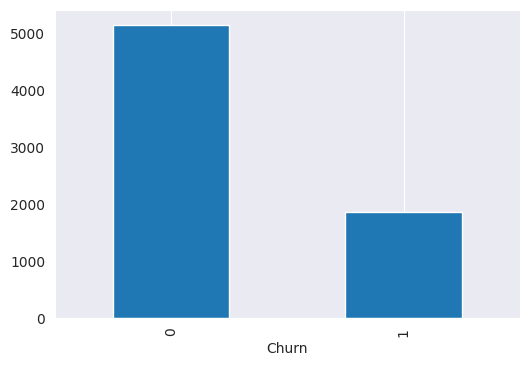

In [13]:
dataset['Churn'].value_counts().plot.bar(figsize=(6, 4))
plt.grid(axis='y')
plt.show()

In [14]:
dataset['Churn'].value_counts(normalize=True)

Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

Отскалируем числовые данные.

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
scaled_dataset = dataset
float_columns = dataset.select_dtypes(include=["float64", "int64"]).columns
scaled_dataset[float_columns] = scaler.fit_transform(dataset[float_columns])
scaled_dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.464789,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.014085,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.619718,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,0.323944,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,0.0,0.0,1.0,1.0,0.140845,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1.0,1.0,1.0,0.0,0.042254,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


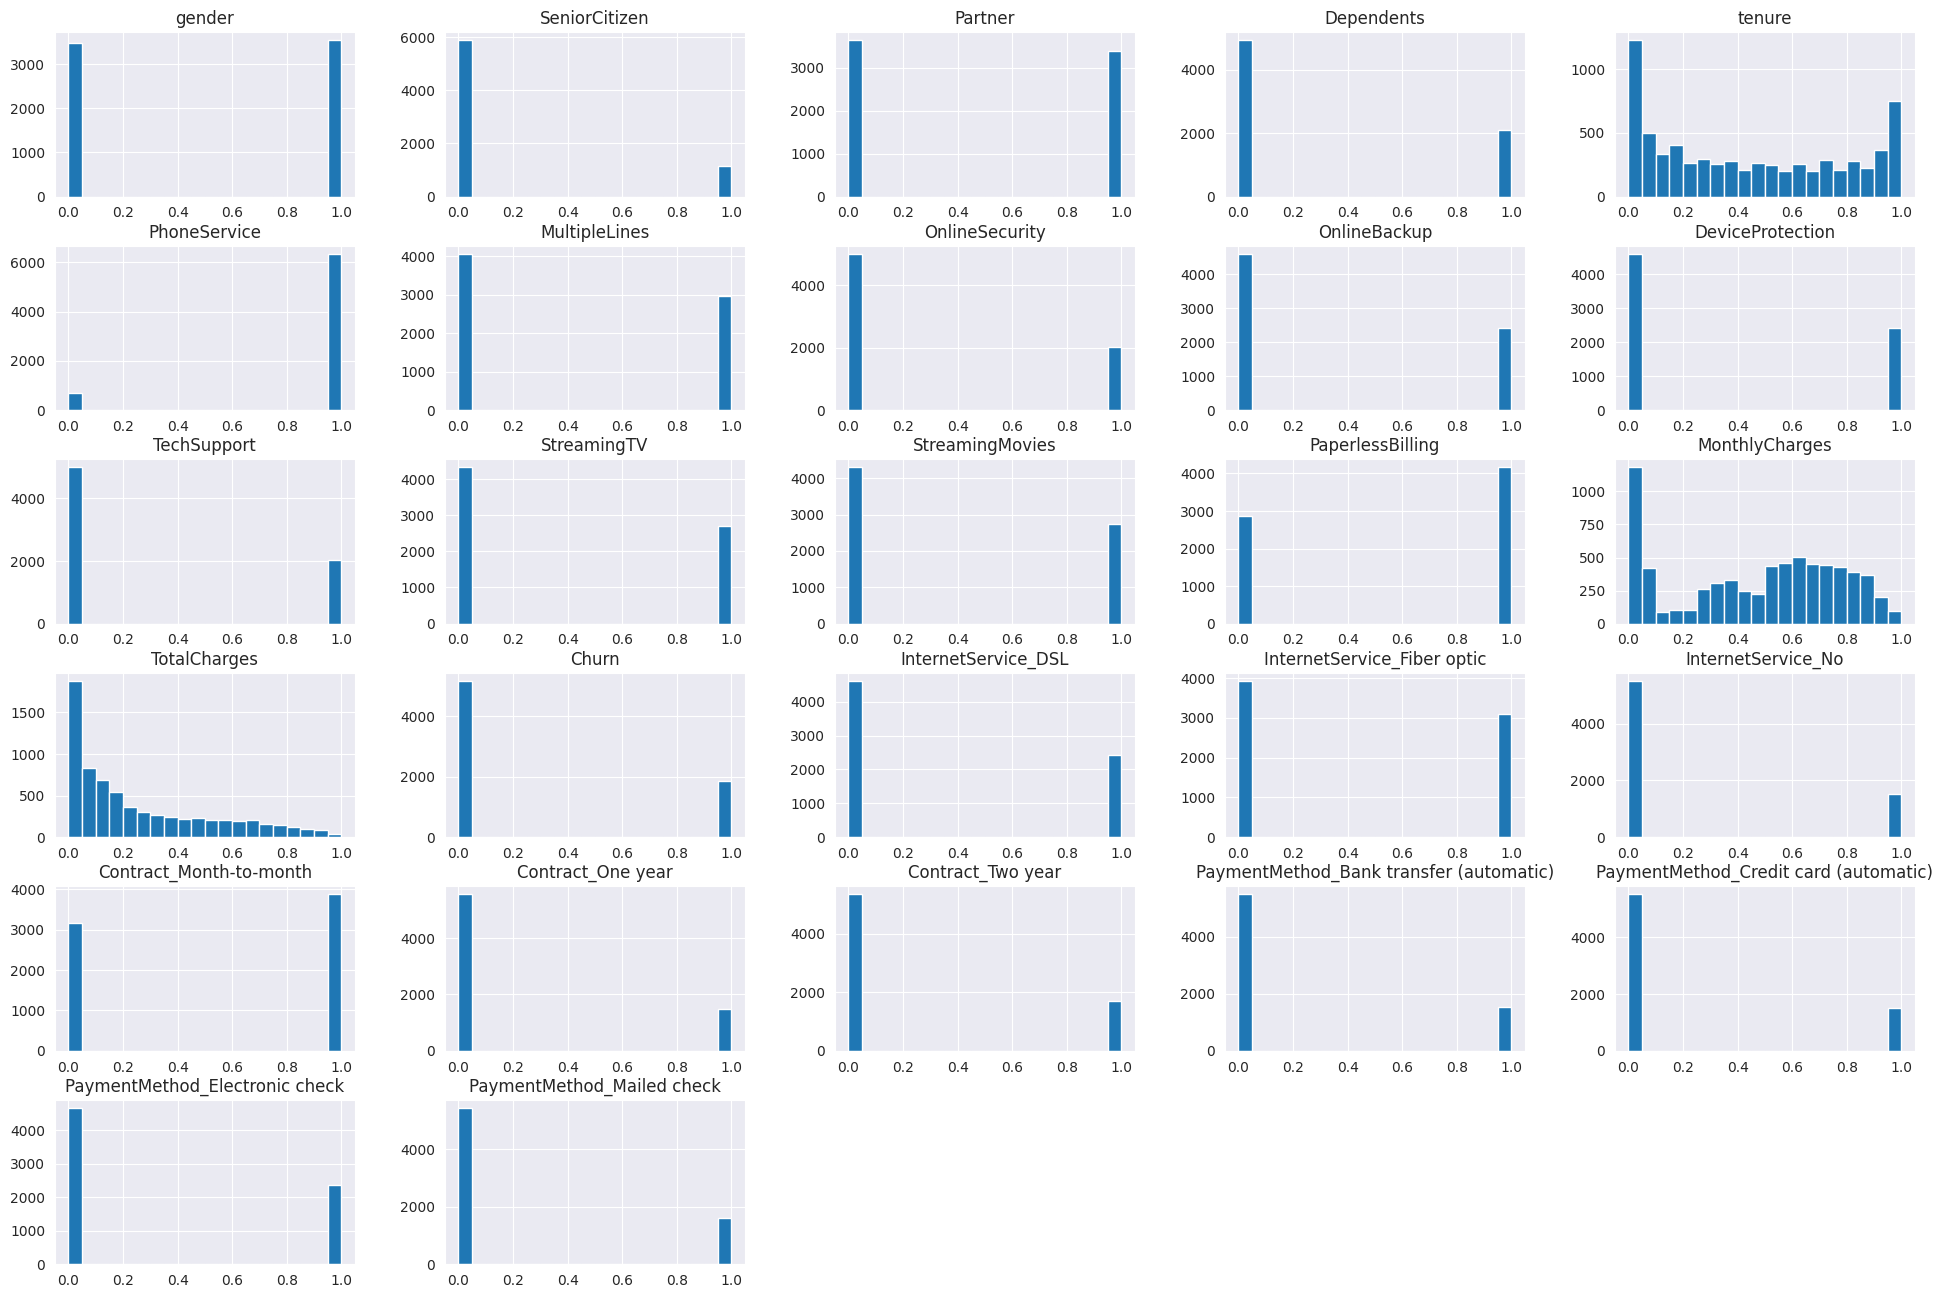

In [16]:
dataset.hist(figsize=(24, 16), bins=20);

Выведем correlation map

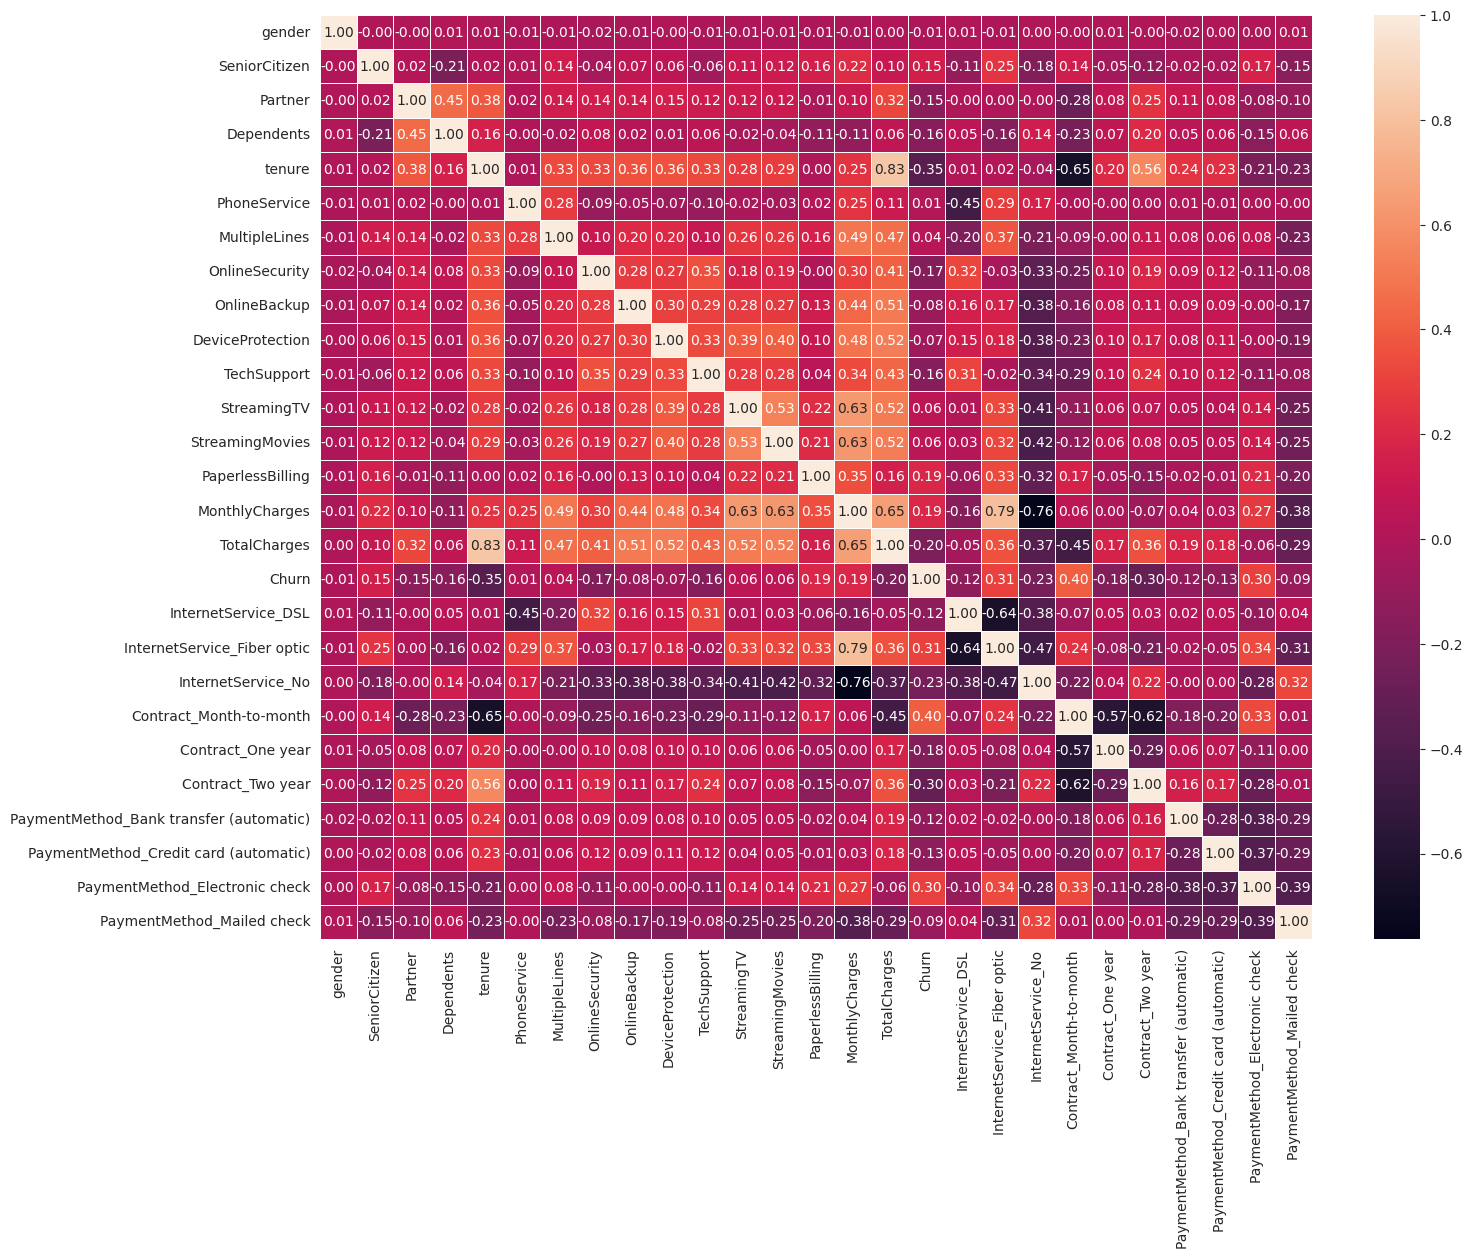

In [17]:
plt.figure(figsize=(16, 12))
sns.heatmap(dataset.corr(), annot=True, cbar=True, linewidths=.5, fmt= '.2f')
plt.show()

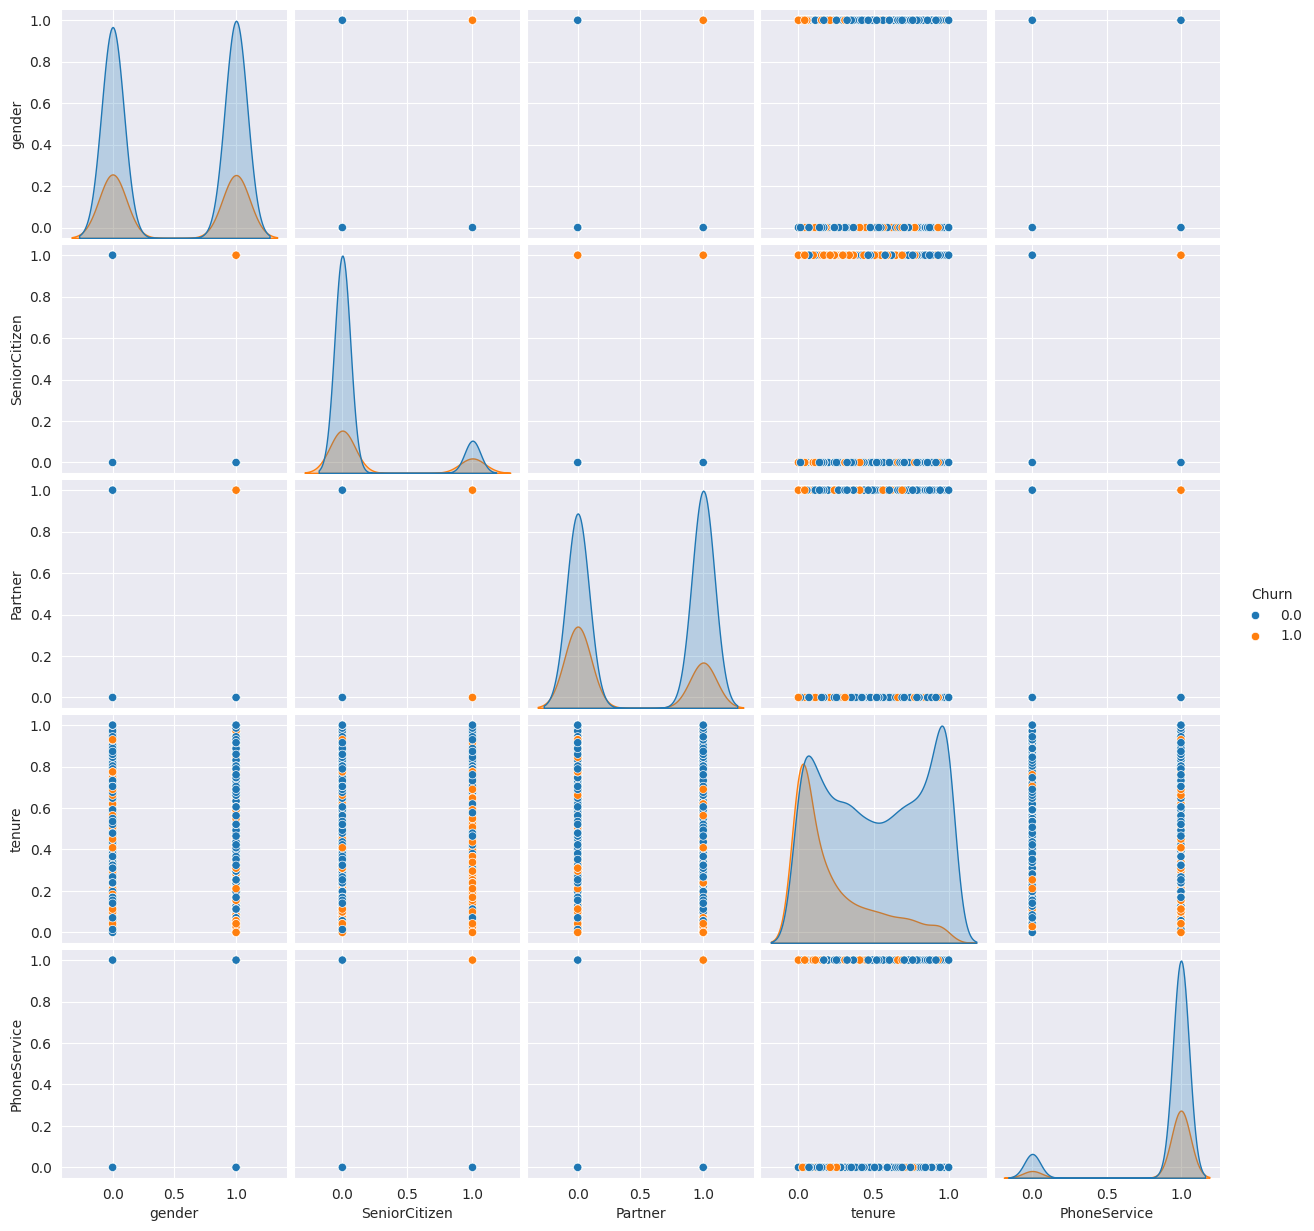

In [18]:
sns.pairplot(dataset[['Churn', 'gender', "SeniorCitizen", "Partner", "tenure", "PhoneService"]], hue='Churn'); # Отобрал отдельные столбцы. По всем столбцам строится очень долго.

# Подготовка к обучению.
Выделим валидационные данные.

In [19]:
from sklearn.model_selection import train_test_split

# Разделяем данные: 80% - train, 20% - validation
train_set, val_set = train_test_split(dataset, test_size=0.2, random_state=42)
train_set


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6030,0.0,0.0,0.0,0.0,0.591549,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3410,1.0,0.0,0.0,0.0,0.028169,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5483,0.0,0.0,1.0,0.0,0.760563,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5524,1.0,0.0,1.0,1.0,0.619718,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6337,0.0,0.0,1.0,1.0,0.760563,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,1.0,0.0,0.0,0.0,0.028169,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5199,0.0,0.0,0.0,0.0,0.704225,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5235,1.0,0.0,0.0,0.0,0.112676,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5399,0.0,0.0,0.0,0.0,0.690141,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [20]:
train_set.shape, val_set.shape,

((5625, 27), (1407, 27))

Выделим обучающие и тестовые данные.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    train_set.drop(['Churn'], axis=1), train_set['Churn'], test_size=0.20, random_state=5, stratify=train_set['Churn']
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4500, 26), (1125, 26), (4500,), (1125,))

In [22]:
y_train.value_counts(normalize=True)

Churn
0.0    0.734222
1.0    0.265778
Name: proportion, dtype: float64

Строим вариант бустинга из sklearn с гиперпараметрами по умолчанию.

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score


model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_sklearn = roc_auc_score(y_test, y_pred)
accuracy_sklearn

0.690734652230599

Повторим классификацию с помощью XGBoost с параметрами по умолчанию.

In [39]:
from xgboost import XGBClassifier
import pandas as pd


model = XGBClassifier(eval_metric="logloss")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_xgboost = roc_auc_score(y_test, y_pred)
accuracy_xgboost

0.7082364945297887

In [40]:
# catboost не заработал в окружении с остальными. Попробую отдельно его запустить.
from catboost import CatBoostClassifier


model = CatBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_catboost = roc_auc_score(y_test, y_pred)
accuracy_catboost

Learning rate set to 0.019582
0:	learn: 0.6786796	total: 1.75ms	remaining: 1.74s
1:	learn: 0.6654503	total: 3.52ms	remaining: 1.75s
2:	learn: 0.6523743	total: 5.17ms	remaining: 1.72s
3:	learn: 0.6403425	total: 6.93ms	remaining: 1.73s
4:	learn: 0.6294549	total: 9.14ms	remaining: 1.82s
5:	learn: 0.6177212	total: 11ms	remaining: 1.83s
6:	learn: 0.6076738	total: 12.7ms	remaining: 1.8s
7:	learn: 0.5979383	total: 14.3ms	remaining: 1.78s
8:	learn: 0.5885213	total: 16.1ms	remaining: 1.77s
9:	learn: 0.5794126	total: 18.4ms	remaining: 1.82s
10:	learn: 0.5724807	total: 20ms	remaining: 1.8s
11:	learn: 0.5665763	total: 21ms	remaining: 1.73s
12:	learn: 0.5598723	total: 22ms	remaining: 1.67s
13:	learn: 0.5522449	total: 23.7ms	remaining: 1.67s
14:	learn: 0.5454948	total: 25.5ms	remaining: 1.67s
15:	learn: 0.5394492	total: 27.4ms	remaining: 1.68s
16:	learn: 0.5341997	total: 29ms	remaining: 1.68s
17:	learn: 0.5284197	total: 30.7ms	remaining: 1.67s
18:	learn: 0.5231245	total: 32.3ms	remaining: 1.67s
19:	

0.7101962149861927

In [41]:
import lightgbm as lgb

model = lgb.LGBMClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_lgbm = roc_auc_score(y_test, y_pred)
accuracy_lgbm

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1196, number of negative: 3304
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 628
[LightGBM] [Info] Number of data points in the train set: 4500, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151


0.7247847951606241

In [44]:
columns = ['Наименование теста', 'sklearn boosting', 'XGBoost', 'catboost', "LightGBM"]
data = [['default parameters boosting', accuracy_sklearn, accuracy_xgboost, accuracy_catboost, accuracy_lgbm]]
print('ROG-AUC metrics')
rog_auc_results = pd.DataFrame(data, columns=columns)
rog_auc_results

ROG-AUC metrics


,Наименование теста,sklearn boosting,XGBoost,catboost,LightGBM
0,default parameters boosting,0.690735,0.708236,0.710196,0.724785
